<a href="https://colab.research.google.com/github/cr0wley-zz/Embeddings/blob/main/Cbow_Crude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
filename = 'input.txt'
urllib.request.urlretrieve(url, filename)

('input.txt', <http.client.HTTPMessage at 0x7fd2c119a898>)

In [ ]:
text = open('input.txt','r').read()
tokenized_text = tf.keras.preprocessing.text.text_to_word_sequence(text)[:5000]
vocab = sorted(set(tokenized_text))
vocab_size = len(vocab)
print('Vocab Size: {}'.format(len(vocab)))

Vocab Size: 1389


In [ ]:
'queen' in vocab

False

In [ ]:
vocab_to_ix = {c:ix for ix,c in enumerate(vocab)}
ix_to_vocab = np.array(vocab)
text_as_int = np.array([vocab_to_ix[c] for c in tokenized_text])

In [ ]:
EMBEDDING_SIZE = 500
embedding_matrix_enc =  tf.Variable(np.random.rand(EMBEDDING_SIZE, vocab_size))
embedding_matrix_dec = tf.Variable(np.random.rand(vocab_size, EMBEDDING_SIZE))

In [ ]:
data = []

for i in range(2, len(text_as_int) - 5):
    context = np.array([text_as_int[i-2], text_as_int[i-1],
               text_as_int[i+1], text_as_int[i+2]])
    target = text_as_int[i]
    data.append((context, target))

In [ ]:
def encoding(contxt,enc_matrix):
  sm = 0
  for i in contxt:
    sm = sm + enc_matrix[:,i]
  return sm/4  


In [ ]:
def decoding(embeddings, dec_matrix):
  return tf.matmul(dec_matrix, embeddings)

In [ ]:
def loss(decoded, target):
  decoded_exp = tf.exp(decoded)
  decoded_soft = decoded_exp/tf.reduce_sum(decoded_exp)
  soft_loss = -1 * tf.math.log(decoded_soft[target])
  return soft_loss


In [ ]:
def train_step(cntxt, trgt,t_l):

  with tf.GradientTape() as tape:
    enc = encoding(cntxt,embedding_matrix_enc)
    dec = decoding(tf.reshape(enc, (-1, 1)), embedding_matrix_dec)
    l = loss(dec, trgt)

  t_l.append(l.numpy())      
  grad = tape.gradient(l, [embedding_matrix_enc, embedding_matrix_dec])
  opt.apply_gradients(zip(grad, [embedding_matrix_enc, embedding_matrix_dec]))
    

    

In [ ]:
epochs = 200
t_l = []
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
for i in tqdm(range(epochs)):
    for cntxt, trgt in data:
        train_step(cntxt, trgt, t_l)

100%|██████████| 200/200 [1:14:17<00:00, 22.29s/it]


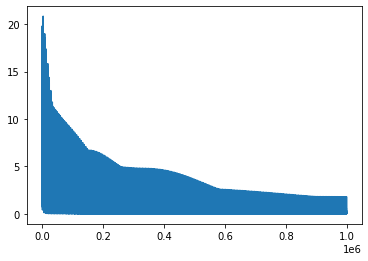

In [ ]:
plt.figure()
plt.plot(t_l)

In [ ]:
from sklearn.manifold import TSNE


TSNE_embedd = TSNE(n_components=3).fit_transform(embedding_matrix_enc.numpy().T)
TSNE_decod = TSNE(n_components=3).fit_transform(embedding_matrix_dec.numpy().T)

In [ ]:
cnt = 0 
for x,y in TSNE_embedd:
  plt.scatter(x,y)
  plt.annotate(ix_to_vocab[cnt], (x,y))
  cnt += 1

plt.show()

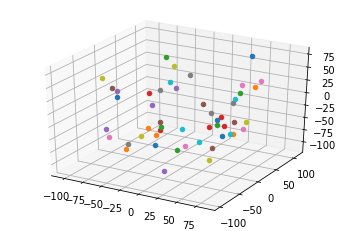

In [ ]:
cnt = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for x,y,z in TSNE_embedd[400:450]:
  ax.scatter(x, y, z)
  #ax.text(x, y, z)
  cnt += 1

plt.show()


In [ ]:
def cbow_output(data):
    ans = embed(data)
    enc = cbow_enc(ans[0])
    dec = cbow_dec(enc)
    
    index = np.argmax(dec.numpy())
    x = list(vocab)
    return x[index]
    

In [ ]:
for i in range(0, vocab_size-1):
  print(cbow_output(data[i]),data[i][1]) 

can is
devjyoti. devjyoti.
so? your
discuss name
can is
are. aritra.
discuss i
can can
talk keep
talk talking
my about
other. names
but but
discuss let's
other. not
how talk
devjyoti. about
other. each
other. other.
names we
is can
names discuss
names names
think later.
are. but
talk first
to i
can want
talk to
talk talk
let's how


In [ ]:
print(data[2][1])

your
